In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline

In [327]:
presc = pd.read_csv('2011_data/total_prescriptions_V4.csv.gz', compression='gzip')
wards = pd.read_csv('data_prep/Wards.csv')

In [328]:
LSOA_London = pd.read_csv('data_prep/ons-mye-LSOA11.csv', thousands=',')

In [329]:
presc['YYYYMM'].unique()

array([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108,
       201109, 201110, 201111, 201112])

In [330]:
LSOA_London.head()

,Lower Super Output Area,Year,LSOA11NM,LAD11NM,LAD11CD,M;0,M;1,M;2,M;3,M;4,...,F;82,F;83,F;84,F;85,F;86,F;87,F;88,F;89,F;90+,Total_pop
0,E01000001,2001,City of London 001A,City of London,E09000001,6,3,0,4,3,...,7,3,0,1,1,7,5,0,2,1615
1,E01000002,2001,City of London 001B,City of London,E09000001,2,3,4,0,2,...,3,2,7,0,1,1,1,2,2,1493
2,E01000003,2001,City of London 001C,City of London,E09000001,3,7,9,5,6,...,3,6,3,5,7,14,9,3,9,1573
3,E01000005,2001,City of London 001E,City of London,E09000001,6,10,12,10,5,...,4,0,0,3,4,2,0,2,2,1090
4,E01032739,2001,City of London 001F,City of London,E09000001,0,7,0,0,3,...,0,0,0,0,1,1,0,0,0,639


In [331]:
LSOA_London = LSOA_London[['Lower Super Output Area','Total_pop']].copy()

In [332]:
presc_sub = presc[presc['YYYYMM'] == 201101]

In [333]:
presc_sub.head()

,YYYYMM,LSOA_CODE,Total_quantity,Total_cost,Total_items,Patient_count
0,201101,E01012190,200414.116601,18733.560064,2168.479928,1414.0
1,201101,E01012191,214644.484631,20144.149027,2324.612082,1618.0
2,201101,E01012192,214034.121754,19612.482444,2489.492485,1511.0
3,201101,E01012194,197406.008222,18090.162984,2250.734586,1480.0
4,201101,E01012258,170651.394793,15643.479155,1978.476998,1354.0


In [334]:
presc_merged = pd.merge(presc_sub,LSOA_London , left_on='LSOA_CODE',right_on='Lower Super Output Area')

presc_merged.corr()

,YYYYMM,Total_quantity,Total_cost,Total_items,Patient_count,Total_pop
YYYYMM,NaN,NaN,NaN,NaN,NaN,NaN
Total_quantity,NaN,1.000000,0.912548,0.876589,0.487227,0.435672
Total_cost,NaN,0.912548,1.000000,0.895361,0.426702,0.433668
Total_items,NaN,0.876589,0.895361,1.000000,0.453260,0.423336
Patient_count,NaN,0.487227,0.426702,0.453260,1.000000,0.508106
Total_pop,NaN,0.435672,0.433668,0.423336,0.508106,1.000000


In [335]:
np.corrcoef(presc_merged['Total_pop'], presc_merged['Patient_count'])

array([[1.        , 0.50810608],
       [0.50810608, 1.        ]])

In [336]:
mappings_dir = 'mappings/'
def loadLSOA_mappings():
    LSOA_dist_old = json.load(open(mappings_dir + 'GP_LSOA_PATIENTSDIST.json','rb'))
    LSOA_dist_2021 = json.load(open(mappings_dir + 'GP_LSOA_PATIENTSDIST_2021.json','rb'))
    return [LSOA_dist_old , LSOA_dist_2021]

def prepare_lsoa_GP_population():
    LSOA_patient_pop = {}
    LSOA_patients_map = json.load(open(mappings_dir + 'GPs.json','r'))
    for GP in tqdm(LSOA_patients_map):
        for lsoa in LSOA_patients_map[GP]['Patient_registry_LSOA']:
            if lsoa not in LSOA_patient_pop:
                LSOA_patient_pop[lsoa] = LSOA_patients_map[GP]['Patient_registry_LSOA'][lsoa]
            else:
                LSOA_patient_pop[lsoa] += LSOA_patients_map[GP]['Patient_registry_LSOA'][lsoa]
    return LSOA_patient_pop

In [338]:
old , new = loadLSOA_mappings()

In [339]:
old.keys()

[u'E84702',
 u'E84701',
 u'E84706',
 u'E84704',
 u'E84705',
 u'E84708',
 u'E84709',
 u'B85014',
 u'B85015',
 u'B85016',
 u'B85010',
 u'B85011',
 u'B85012',
 u'B85018',
 u'B85019',
 u'N81032',
 u'N81033',
 u'N81030',
 u'N81031',
 u'N81036',
 u'N81037',
 u'N81034',
 u'N81035',
 u'N81038',
 u'N81039',
 u'N82046',
 u'N82041',
 u'N82048',
 u'N82049',
 u'G82162',
 u'Y00105',
 u'G82160',
 u'G82161',
 u'G82164',
 u'G82165',
 u'Y01851',
 u'M82050',
 u'M82051',
 u'M82055',
 u'M82056',
 u'M82057',
 u'M82058',
 u'M82059',
 u'L83131',
 u'H81647',
 u'H81644',
 u'H81643',
 u'H81642',
 u'H81641',
 u'L83137',
 u'L83136',
 u'E85617',
 u'M82620',
 u'F84062',
 u'F84063',
 u'F84060',
 u'F81012',
 u'G85673',
 u'K81059',
 u'G85674',
 u'K81052',
 u'K81051',
 u'K81050',
 u'K81057',
 u'K81056',
 u'K81055',
 u'P92042',
 u'F84097',
 u'F84096',
 u'F84093',
 u'F84092',
 u'F84091',
 u'E81626',
 u'Y04225',
 u'C82078',
 u'C82079',
 u'H82016',
 u'Y02778',
 u'C82076',
 u'C82077',
 u'C82070',
 u'C82071',
 u'C82072',
 u'C

(1.3862943611198906, 9.876886870738948, 7.456454555176209, 7.48921846837641, 0.24745173549319055)


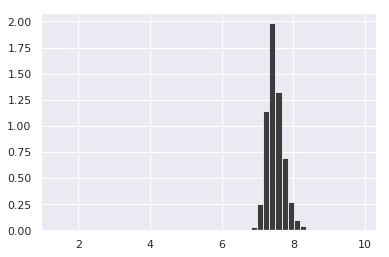

In [313]:
# the histogram of the data
data = np.log(presc['Patient_count'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(0.007729861676159479, 516.0174861504569, 40.7568003862832, 45.591561463458746, 31.04033560450212)


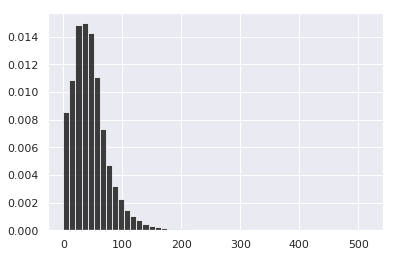

In [229]:
# the histogram of the data
data = (presc['Total_items'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(0.06193636086248984, 11403.602427734975, 427.5167537193392, 470.297095795773, 304.26202076087094)


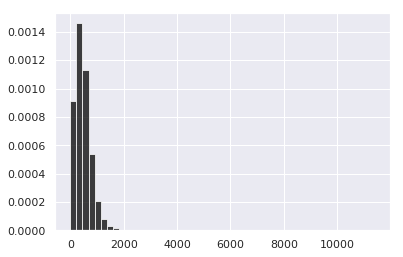

In [230]:
# the histogram of the data
data = (presc['Total_cost'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

In [231]:
wards.head(n=3)

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London


In [232]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [233]:
London_preac = presc[presc['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [234]:
London_preac.sort_values(by=['YYYYMM'],inplace=True)

/10TBdrive/sagarj/anaconda3/envs/env_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
area_dict = {'YYYYMM':[], 'mean_cost':[] , 'mean_items' : [] , 'mean_quantity' : []}
for name , group in London_preac.groupby('YYYYMM'):
    area_dict['YYYYMM'].append(name)
    area_dict['mean_cost'].append((np.sum(group['Total_cost'])/np.sum(group['Patient_count'])))
    area_dict['mean_items'].append((np.sum(group['Total_items'])/np.sum(group['Patient_count'])))
    area_dict['mean_quantity'].append((np.sum(group['Total_quantity'])/np.sum(group['Patient_count'])))
area_df = pd.DataFrame.from_dict(area_dict)
area_df.sort_values(by=['YYYYMM'],inplace=True)

(0.09641091690373173, 0.13369563540895177, 0.11237806958692687, 0.11390952445274634, 0.00852723852149106)


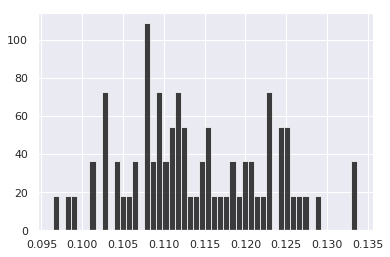

In [237]:
data = (area_df['mean_cost'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

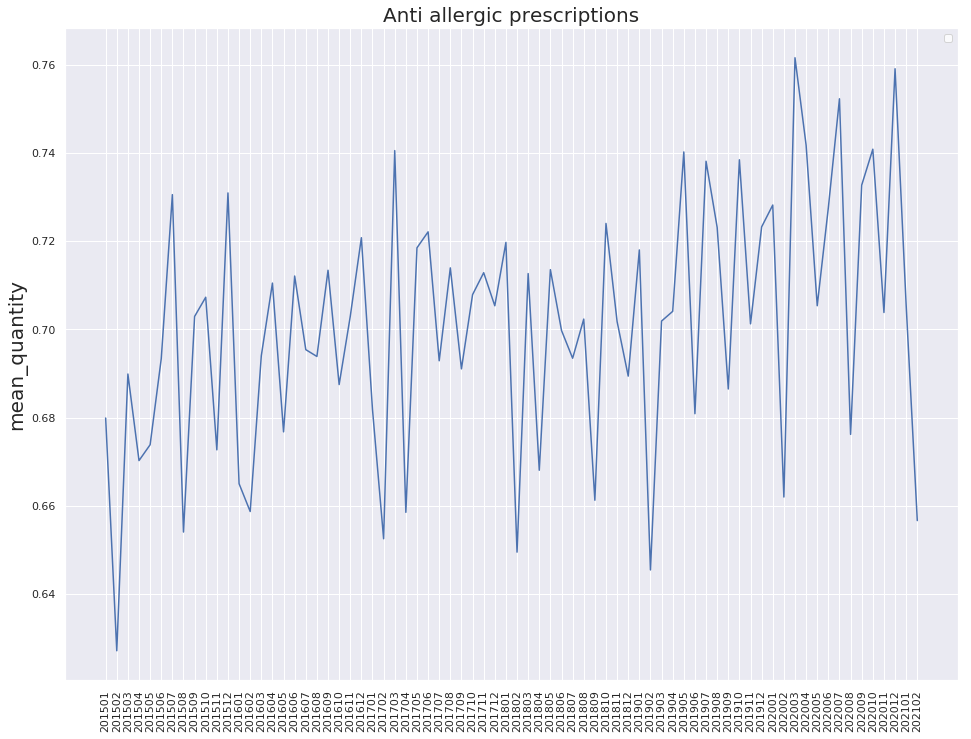

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.title("Anti allergic prescriptions",fontsize=20)
plt.ylabel("Prescriptions per capita",fontsize=20)
# sns.lineplot(y=area_df['mean_items'],x=np.arange(0,len(area_df),1))
sns.lineplot(y=area_df['mean_quantity'],x=np.arange(0,len(area_df),1))
# sns.lineplot(y=area_df['mean_cost'],x=np.arange(0,len(area_df),1))
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)
ax.legend()